In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import confusion_matrix, classification_report, f1_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/onehot_encoding_standard_scaling_data.csv", delimiter=",")
print(df.shape)
df.head()

(5976, 48)


,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,Churn_No,Churn_Yes
0,1.611381,-1.353483,-0.247769,False,True,True,False,False,True,False,...,False,True,True,False,False,True,False,False,True,False
1,0.468468,0.774066,0.736669,True,False,True,False,True,False,True,...,False,False,False,True,False,True,False,False,True,False
2,0.223558,0.335602,0.251453,True,False,False,True,False,True,True,...,False,False,False,True,True,False,False,False,False,True
3,-1.164265,-0.297182,-0.905725,False,True,True,False,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,-1.245901,-0.378564,-0.958057,False,True,True,False,True,False,True,...,False,False,True,False,False,False,True,False,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976 entries, 0 to 5975
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   5976 non-null   float64
 1   MonthlyCharges                           5976 non-null   float64
 2   TotalCharges                             5976 non-null   float64
 3   gender_Female                            5976 non-null   bool   
 4   gender_Male                              5976 non-null   bool   
 5   SeniorCitizen_0                          5976 non-null   bool   
 6   SeniorCitizen_1                          5976 non-null   bool   
 7   Partner_No                               5976 non-null   bool   
 8   Partner_Yes                              5976 non-null   bool   
 9   Dependents_No                            5976 non-null   bool   
 10  Dependents_Yes                           5976 no

In [5]:
df.columns.unique()

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No_phone_service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber_optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No_internet_service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No_internet_service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No_internet_service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No_internet_service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No_internet_service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One_year',
       '

In [6]:
df.isnull().sum()

tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
gender_Female                              0
gender_Male                                0
SeniorCitizen_0                            0
SeniorCitizen_1                            0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No_phone_service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber_optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No_internet_service         0
OnlineSecurity_Yes                         0
OnlineBack

In [7]:
df.isna().sum()

tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
gender_Female                              0
gender_Male                                0
SeniorCitizen_0                            0
SeniorCitizen_1                            0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No_phone_service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber_optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No_internet_service         0
OnlineSecurity_Yes                         0
OnlineBack

In [8]:
df.dtypes

tenure                                     float64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Female                                 bool
gender_Male                                   bool
SeniorCitizen_0                               bool
SeniorCitizen_1                               bool
Partner_No                                    bool
Partner_Yes                                   bool
Dependents_No                                 bool
Dependents_Yes                                bool
PhoneService_No                               bool
PhoneService_Yes                              bool
MultipleLines_No                              bool
MultipleLines_No_phone_service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber_optic                   bool
InternetService_No                            bool
OnlineSecurity_No              

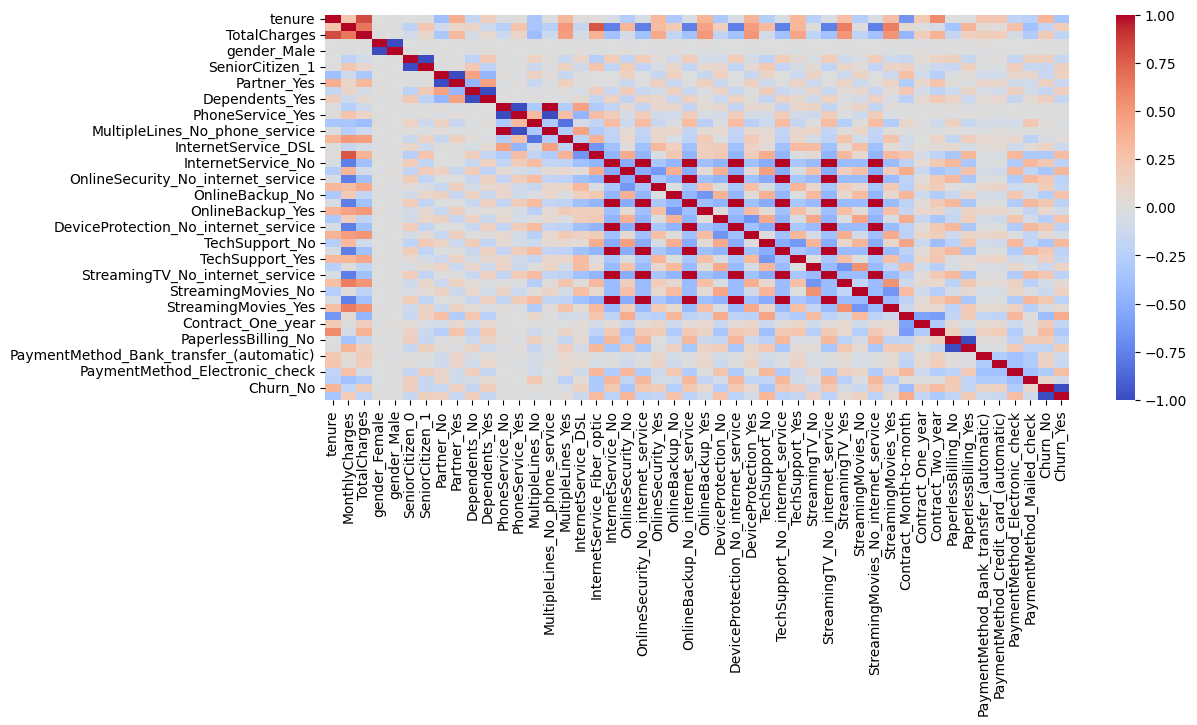

In [9]:
plt.figure(figsize=(12, 5))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm');

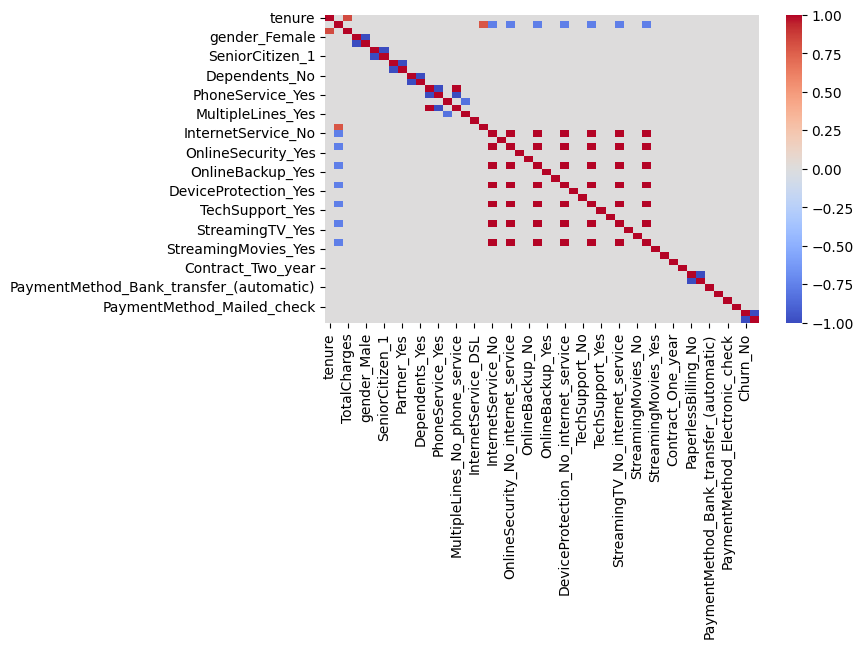

In [11]:
r = df.corr()
r[abs(r) <= 0.75] = 0
plt.figure(figsize=(7, 4))
sns.heatmap(r, annot=False, cmap='coolwarm');

In [12]:
df

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,Churn_No,Churn_Yes
0,1.611381,-1.353483,-0.247769,False,True,True,False,False,True,False,...,False,True,True,False,False,True,False,False,True,False
1,0.468468,0.774066,0.736669,True,False,True,False,True,False,True,...,False,False,False,True,False,True,False,False,True,False
2,0.223558,0.335602,0.251453,True,False,False,True,False,True,True,...,False,False,False,True,True,False,False,False,False,True
3,-1.164265,-0.297182,-0.905725,False,True,True,False,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,-1.245901,-0.378564,-0.958057,False,True,True,False,True,False,True,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,-1.286719,1.001603,-0.968831,False,True,True,False,False,True,True,...,False,False,False,True,False,False,True,False,False,True
5972,-0.388717,0.872057,-0.043871,True,False,True,False,False,True,False,...,False,True,False,True,False,True,False,False,True,False
5973,-0.837718,-1.451473,-0.876018,False,True,True,False,False,True,False,...,False,False,False,True,False,False,True,False,True,False
5974,-0.837718,1.149419,-0.482824,False,True,False,True,True,False,True,...,False,False,False,True,False,False,True,False,False,True


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Churn_Yes','Churn_No' ]),
                                                    df['Churn_Yes'],
                                                    test_size=0.3,
                                                    random_state=42)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4183, 46), (1793, 46), (4183,), (1793,))

In [15]:
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numeric_features = X_train.select_dtypes(exclude=['object']).columns.tolist()
categorical_features, numeric_features

([],
 ['tenure',
  'MonthlyCharges',
  'TotalCharges',
  'gender_Female',
  'gender_Male',
  'SeniorCitizen_0',
  'SeniorCitizen_1',
  'Partner_No',
  'Partner_Yes',
  'Dependents_No',
  'Dependents_Yes',
  'PhoneService_No',
  'PhoneService_Yes',
  'MultipleLines_No',
  'MultipleLines_No_phone_service',
  'MultipleLines_Yes',
  'InternetService_DSL',
  'InternetService_Fiber_optic',
  'InternetService_No',
  'OnlineSecurity_No',
  'OnlineSecurity_No_internet_service',
  'OnlineSecurity_Yes',
  'OnlineBackup_No',
  'OnlineBackup_No_internet_service',
  'OnlineBackup_Yes',
  'DeviceProtection_No',
  'DeviceProtection_No_internet_service',
  'DeviceProtection_Yes',
  'TechSupport_No',
  'TechSupport_No_internet_service',
  'TechSupport_Yes',
  'StreamingTV_No',
  'StreamingTV_No_internet_service',
  'StreamingTV_Yes',
  'StreamingMovies_No',
  'StreamingMovies_No_internet_service',
  'StreamingMovies_Yes',
  'Contract_Month-to-month',
  'Contract_One_year',
  'Contract_Two_year',
  'Pape

In [16]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)

In [17]:
categorical_transformer = Pipeline(steps=[
                                          ("cat_imputer", SimpleImputer(strategy='constant',
                                                                        fill_value='Not Available').set_output(transform="pandas")),
                                          ("onehot", OneHotEncoder(sparse_output=False,
                                                                   handle_unknown="ignore").set_output(transform="pandas"))
                                          ])
categorical_transformer

Pipeline(steps=[('cat_imputer',
                 SimpleImputer(fill_value='Not Available',
                               strategy='constant')),
                ('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [18]:
numeric_transformer = Pipeline(steps=[
                                      ("knn_imputer", KNNImputer(n_neighbors=5).set_output(transform="pandas")),
                                      ("scaler", StandardScaler().set_output(transform="pandas"))
                                      ])

numeric_transformer

Pipeline(steps=[('knn_imputer', KNNImputer()), ('scaler', StandardScaler())])

In [19]:
preprocessor = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer,
                                                       numeric_features),
                                               ("cat", categorical_transformer,
                                                       categorical_features)
                                               ]).set_output(transform="pandas")
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('knn_imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges',
                                  'gender_Female', 'gender_Male',
                                  'SeniorCitizen_0', 'SeniorCitizen_1',
                                  'Partner_No', 'Partner_Yes', 'Dependents_No',
                                  'Dependents_Yes', 'PhoneService_No',
                                  'PhoneService_Yes', 'MultipleLines_No',
                                  'MultipleLin...
                                  'OnlineBackup_No_internet_service',
                                  'OnlineBackup_Yes', 'DeviceProtection_No',
                                  'DeviceProtection_No_internet_service',
                                  'DeviceProtection_Yes', 'TechSupport_No',
                                  'TechSupport_No_internet_service', ...]),
                                ('cat',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(fill_value='Not '
                                                                           'Available',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 [])])

In [20]:
pipeline_xgb = Pipeline([("pre_process", preprocessor),
                         ("model", xgb)])
pipeline_xgb

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'gender_Female',
                                                   'gender_Male',
                                                   'SeniorCitizen_0',
                                                   'SeniorCitizen_1',
                                                   'Partner_No', 'Partner_Yes',
                                                   'Dependents_No',
                                                   'Dependents_Yes',
                                                   'PhoneService_No',
                                                   'PhoneService_Yes',...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [21]:
pipeline_xgb.fit(X_train, y_train)
y_pred = pipeline_xgb.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
scores = {}
scores['xgb'] = round(f1_score(y_test, y_pred, average='weighted'), 3)

In [23]:
feature_names = pipeline_xgb['pre_process'].get_feature_names_out()
feature_names

array(['num__tenure', 'num__MonthlyCharges', 'num__TotalCharges',
       'num__gender_Female', 'num__gender_Male', 'num__SeniorCitizen_0',
       'num__SeniorCitizen_1', 'num__Partner_No', 'num__Partner_Yes',
       'num__Dependents_No', 'num__Dependents_Yes',
       'num__PhoneService_No', 'num__PhoneService_Yes',
       'num__MultipleLines_No', 'num__MultipleLines_No_phone_service',
       'num__MultipleLines_Yes', 'num__InternetService_DSL',
       'num__InternetService_Fiber_optic', 'num__InternetService_No',
       'num__OnlineSecurity_No',
       'num__OnlineSecurity_No_internet_service',
       'num__OnlineSecurity_Yes', 'num__OnlineBackup_No',
       'num__OnlineBackup_No_internet_service', 'num__OnlineBackup_Yes',
       'num__DeviceProtection_No',
       'num__DeviceProtection_No_internet_service',
       'num__DeviceProtection_Yes', 'num__TechSupport_No',
       'num__TechSupport_No_internet_service', 'num__TechSupport_Yes',
       'num__StreamingTV_No', 'num__StreamingTV_No

In [24]:
xgb_model = pipeline_xgb['model']
xgb_model.feature_importances_

array([0.01674393, 0.01299502, 0.01318666, 0.01143658, 0.        ,
       0.01302416, 0.        , 0.01032678, 0.        , 0.01060186,
       0.        , 0.02056703, 0.        , 0.01311533, 0.        ,
       0.01049602, 0.04832549, 0.07000171, 0.01231906, 0.05331665,
       0.        , 0.01258131, 0.01397954, 0.        , 0.0099769 ,
       0.0128079 , 0.        , 0.0105973 , 0.02098587, 0.        ,
       0.00896036, 0.01254394, 0.        , 0.02520612, 0.0141521 ,
       0.        , 0.01800086, 0.39933932, 0.02427844, 0.03735544,
       0.0154416 , 0.        , 0.01035893, 0.01144223, 0.01572166,
       0.00981389], dtype=float32)

In [25]:
xgb_importances = pd.DataFrame(
    {"feature": feature_names, "importance": np.round(xgb_model.feature_importances_, 3)}
)
xgb_importances = xgb_importances.sort_values("importance", ascending=False).set_index(
    "feature"
)
xgb_importances.head(20)

,importance
feature,
num__Contract_Month-to-month,0.399
num__InternetService_Fiber_optic,0.070
num__OnlineSecurity_No,0.053
num__InternetService_DSL,0.048
num__Contract_Two_year,0.037
num__StreamingTV_Yes,0.025
num__Contract_One_year,0.024
num__TechSupport_No,0.021
num__PhoneService_No,0.021


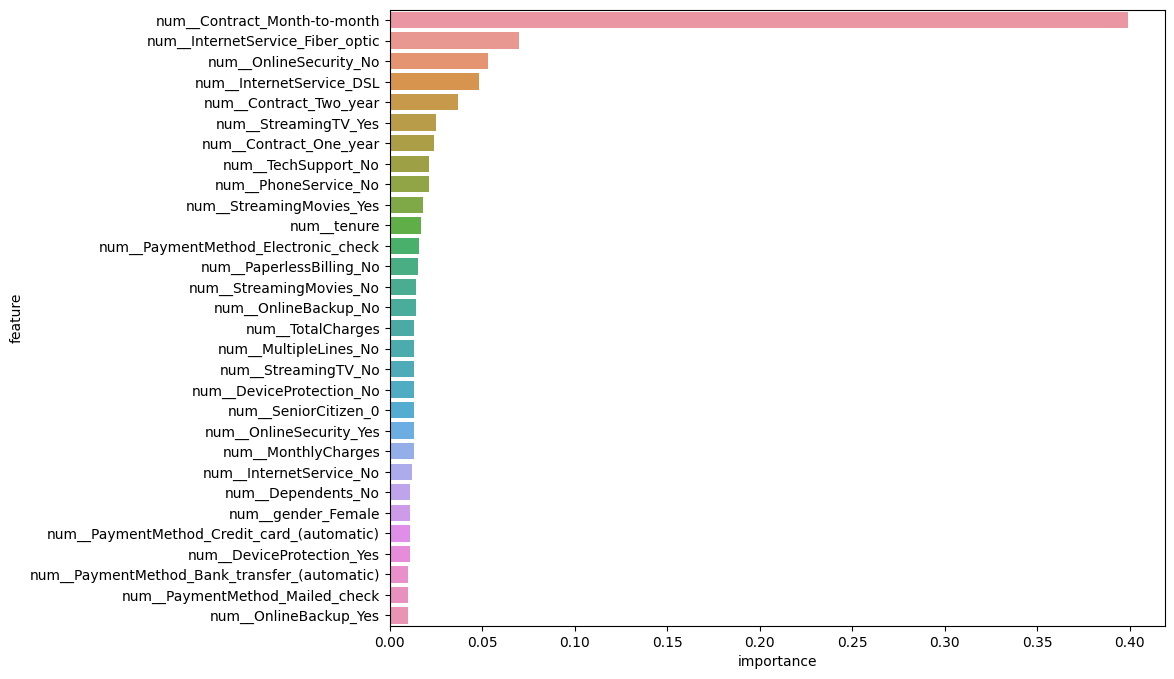

In [26]:
plt.figure(figsize=(10, 8))
sns.barplot(y=xgb_importances.head(30).index,
            x=xgb_importances.head(30).importance);

In [27]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=94a12054c5b0167f3295a60c3e9f97705edfb76cdbe7facc68c66859a15703c4
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [28]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=9e60d69f0591e239d25e039326a1912e6a6db370fa8620df03a721e9b578753d
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [29]:
!pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 2.1 MB/s eta 0:00:00


In [30]:
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp2wyjv9lx
  JVM stdout: /tmp/tmp2wyjv9lx/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp2wyjv9lx/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_unknownUser_uqcxah
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [31]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data = h2o.H2OFrame.from_python(train_data)
train_data['Churn_yes'] = train_data['Churn_Yes'].asfactor()
train_data.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No_phone_service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber_optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No_internet_service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No_internet_service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No_internet_service,DeviceProtection_Yes,TechSupport_No,TechSupport_No_internet_service,TechSupport_Yes,StreamingTV_No,StreamingTV_No_internet_service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No_internet_service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,Churn_Yes,Churn_yes
-1.28672,-0.489841,-0.988577,True,False,True,False,True,False,True,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False
-0.919355,0.242594,-0.661325,False,True,True,False,True,False,True,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,True,False,False,True,True
-0.266262,1.1843,0.132761,True,False,True,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,False,True,True,False,False,False,False,False
-0.715263,0.946795,-0.375301,False,True,True,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,True,False,True,True
-1.00099,-1.49964,-0.953329,False,True,True,False,False,True,False,True,False,True,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False
-1.28672,-0.476554,-0.988401,False,True,True,False,True,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,True
-1.20508,0.159552,-0.913816,False,True,True,False,True,False,False,True,False,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,True
1.28483,-1.35514,-0.324948,True,False,True,False,False,True,False,True,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False
1.24402,0.636216,1.33315,False,True,False,True,False,True,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,True,False,False,False,False,False
1.12156,0.82057,1.28989,False,True,True,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,True,False,False,True,False,False,False


In [32]:
aml = H2OAutoML(max_models=30, # hard total models experimented limit
                max_runtime_secs=300, # try to run as many models in 5 mins
                max_runtime_secs_per_model=30, # max training time for a model <= 30 s else move to next model
                seed=1)
aml.train(x=X_train.columns.tolist(), y="Churn_Yes", training_frame=train_data)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20231222_111308


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    37                 37                          13743                  6            12           7.86486       22            27            24.7838

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.12137184462154783
RMSE: 0.3483846216777483
LogLoss: 0.37702963472006723
Mean Per-Class Error: 0.20418817710373538
AUC: 0.8814560543963144
AUCPR: 0.7262346588439815
Gini: 0.7629121087926287

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3356531172757735
       False    True    Error    Rate
-----  -------  ------  -------  --------------
False  2514     554     0.1806   (554.0/3068.0)
True   254      861     0.2278   (254.0/1115.0)
Total  2768     1415    0.1932   (808.0/4183.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.335653     0.680632  208
max f2                       0.172806     0.780447  285
max f0point5                 0.502927     0.684199  136
max accuracy                 0.502927     0.825484  136
max precision                0.909665     1         0
max recall                   0.0293066    1         381
max specificity              0.909665     1         0
max absolute_mcc             0.341176     0.553076  206
max min_per_class_accuracy   0.308251     0.795632  219
max mean_per_class_accuracy  0.276414     0.797784  234
max tns                      0.909665     3068      0
max fns                      0.909665     1114      0
max fps                      0.0123283    3068      399
max tps                      0.0293066    1115      381
max tnr                      0.909665     1         0
max fnr                      0.909665     0.999103  0
max fpr                      0.0123283    1         399
max tpr                      0.0293066    1         381

Gains/Lift Table: Avg response rate: 26.66 %, avg score: 26.64 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0102797                   0.850797           3.40259    3.40259            0.906977         0.869816   0.906977                    0.869816            0.0349776       0.0349776                  240.259   240.259            0.0336738
2        0.0200813                   0.827209           3.47706    3.43894            0.926829         0.840027   0.916667                    0.855276            0.0340807       0.0690583                  247.706   243.894            0.0667767
3        0.0301219                   0.804341           3.57292    3.4836             0.952381         0.815439   0.928571                    0.841997            0.0358744       0.104933                   257.292   248.36             0.101999
4        0.0401626                   0.7865             3.21563    3.41661            0.857143         0.796654   0.910714                    0.830661            0.032287        0.13722                    221.563   241.661            0.132331
5        0.0502032                   0.767864           3.21563    3.37641            0.857143         0.77751    0

In [33]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb.head(lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_1_AutoML_1_20231222_111308,0.841631,0.420851,0.650158,0.236457,0.370395,0.137193,847,0.01052,GBM
GBM_grid_1_AutoML_1_20231222_111308_model_2,0.841446,0.421994,0.648875,0.238009,0.370468,0.137247,271,0.009424,GBM
GLM_1_AutoML_1_20231222_111308,0.839133,0.424643,0.639023,0.239034,0.372055,0.138425,553,0.004408,GLM
GBM_grid_1_AutoML_1_20231222_111308_model_4,0.835997,0.42701,0.643732,0.242657,0.372774,0.13896,668,0.012285,GBM
GBM_grid_1_AutoML_1_20231222_111308_model_3,0.835478,0.428193,0.636516,0.247393,0.37359,0.13957,218,0.016283,GBM
XRT_1_AutoML_1_20231222_111308,0.834148,0.490679,0.631405,0.245468,0.400262,0.16021,231,0.008496,DRF
GBM_5_AutoML_1_20231222_111308,0.831732,0.431939,0.636281,0.244733,0.375408,0.140931,506,0.011693,GBM
DeepLearning_grid_2_AutoML_1_20231222_111308_model_1,0.831531,0.438507,0.620045,0.245592,0.377115,0.142216,3845,0.026835,DeepLearning
GBM_2_AutoML_1_20231222_111308,0.830527,0.434801,0.621282,0.244326,0.376976,0.142111,440,0.013007,GBM
DeepLearning_grid_3_AutoML_1_20231222_111308_model_1,0.829276,0.442258,0.622684,0.247145,0.379006,0.143646,4610,0.031807,DeepLearning


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
              precision    recall  f1-score   support

       False       0.90      0.78      0.83      1321
        True       0.55      0.75      0.63       472

    accuracy                           0.77      1793
   macro avg       0.72      0.76      0.73      1793
weighted avg       0.80      0.77      0.78      1793



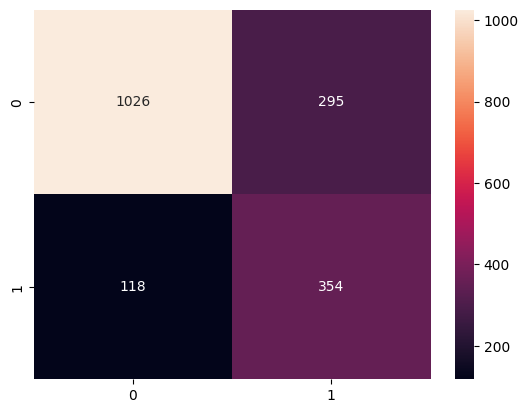

In [43]:
best_model =  aml.get_best_model(criterion="mean_per_class_error")
X_test_h2o = h2o.H2OFrame.from_python(X_test)
y_pred = best_model.predict(X_test_h2o)
y_pred = y_pred.as_data_frame()['predict'].values
cf = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cf_matrix, annot=True, fmt='d');

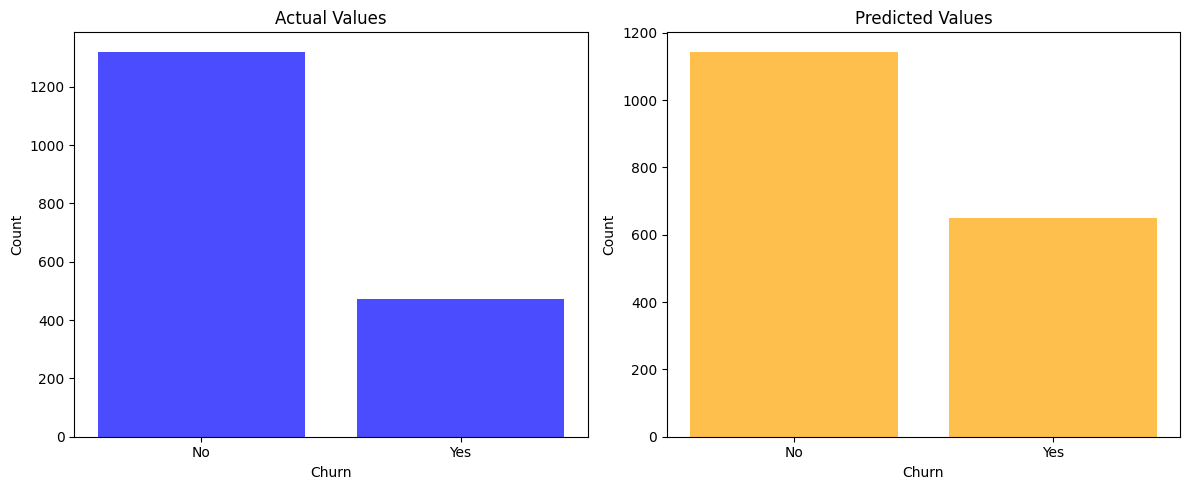

In [40]:
actual_values = np.array(y_test.astype(int))
predicted_values = np.array(y_pred.astype(int))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].hist(actual_values, bins=[-0.5, 0.5, 1.5], rwidth=0.8, color='blue', alpha=0.7)
axes[0].set_title('Actual Values')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No', 'Yes'])
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')

axes[1].hist(predicted_values, bins=[-0.5, 0.5, 1.5], rwidth=0.8, color='orange', alpha=0.7)
axes[1].set_title('Predicted Values')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No', 'Yes'])
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()